Hints/Mini Guide:
 1.Generate summary statistics (mean, median, std, etc.).

 2.Create histograms and boxplots for numeric features.

 3.Use pairplot/correlation matrix for feature relationships.
 
 4.Identify patterns, trends, or anomalies in the data.

 5.Make basic feature-level inferences from visuals.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', np.nan)  # Fixes 'nan' strings
df['Deck'] = df['Deck'].fillna('U')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U


In [7]:
df['Deck'].value_counts()

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [8]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,U
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,U
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,U


In [11]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck'], drop_first=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,22.0,1,0,7.2500,True,False,True,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,True,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True,False,True,False,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,False,False,False,False,False,False,False,True


In [13]:
bool_cols = ['Sex_male',	'Embarked_Q',	'Embarked_S',	'Deck_B',	'Deck_C',	'Deck_D',	'Deck_E',	'Deck_F',	'Deck_G',	'Deck_T',	'Deck_U']
df[bool_cols] = df[bool_cols].astype(int)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 2.Create histograms and boxplots for numeric features.

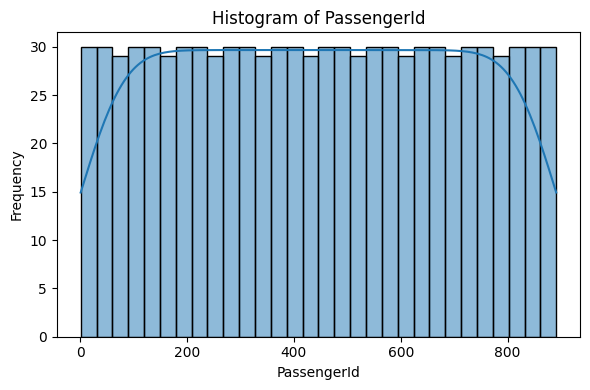

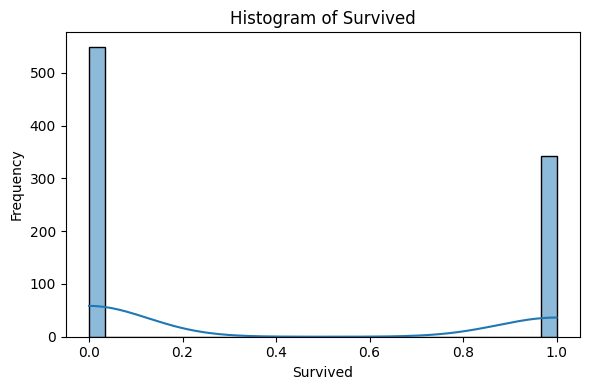

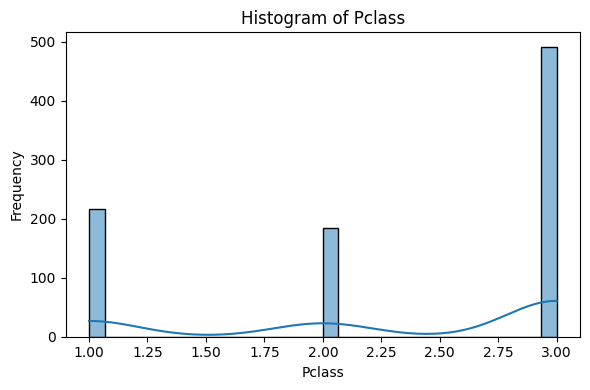

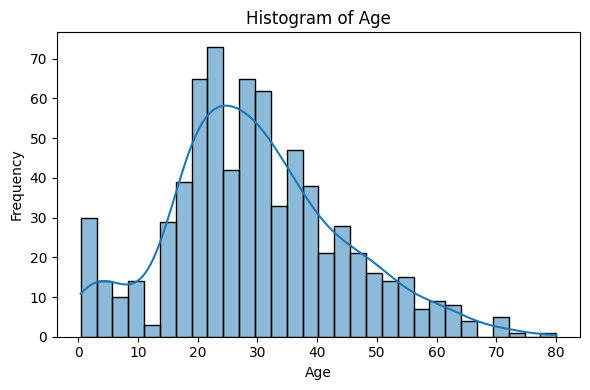

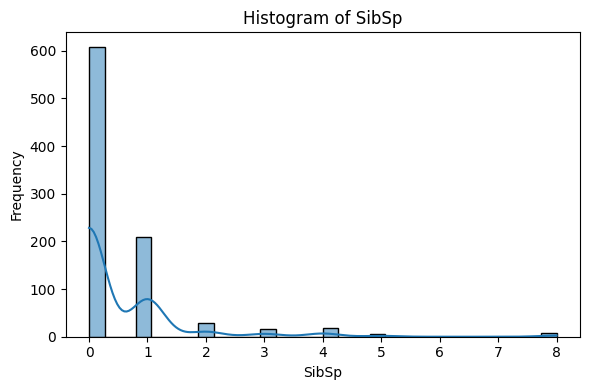

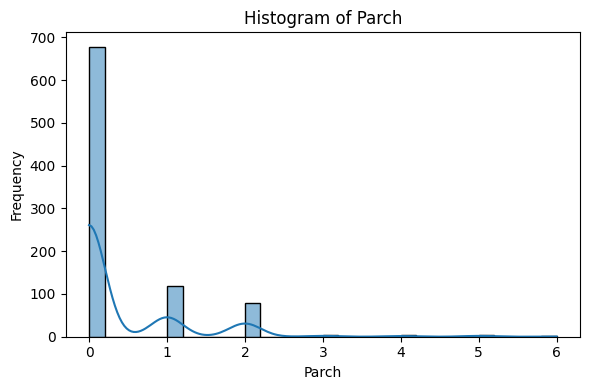

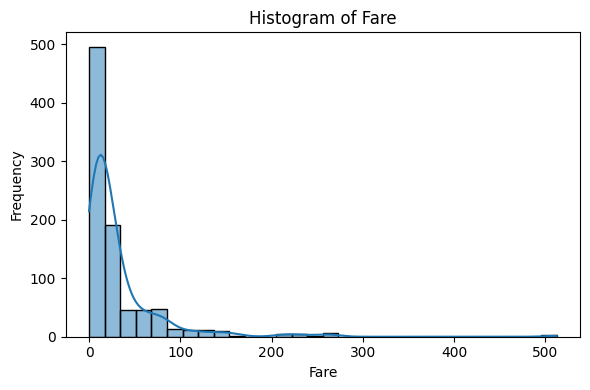

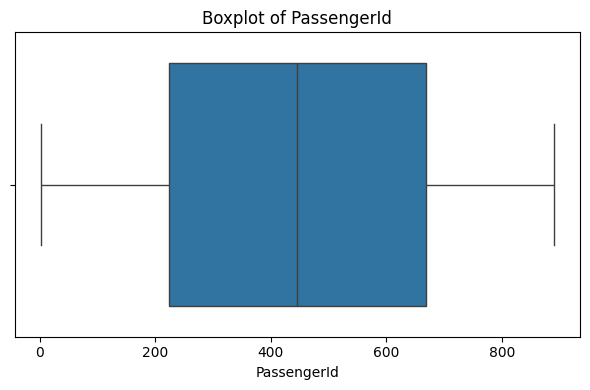

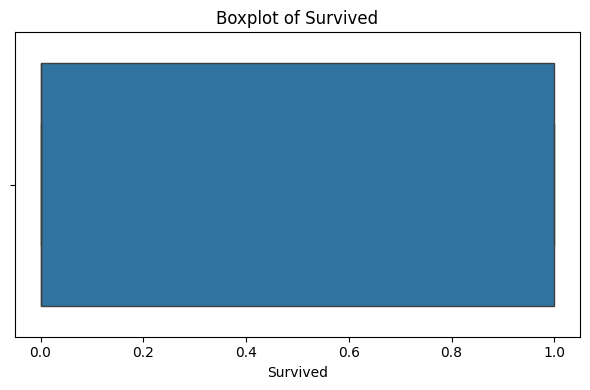

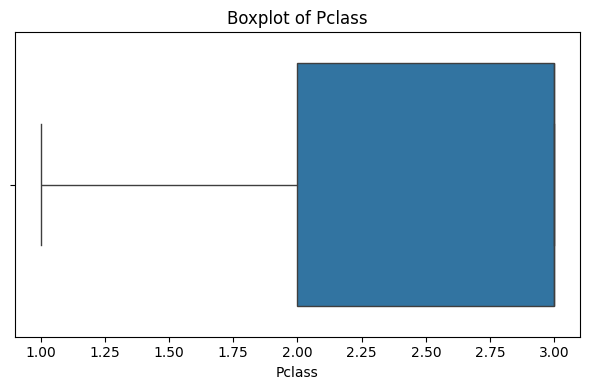

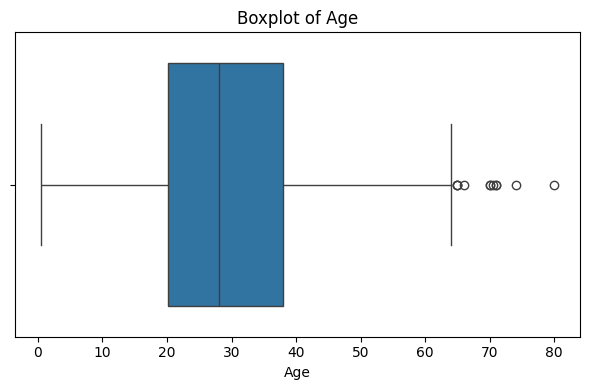

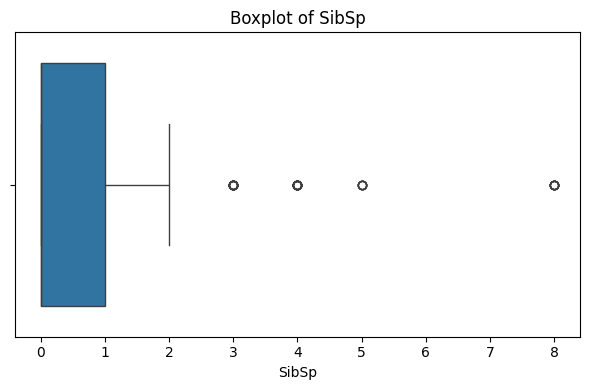

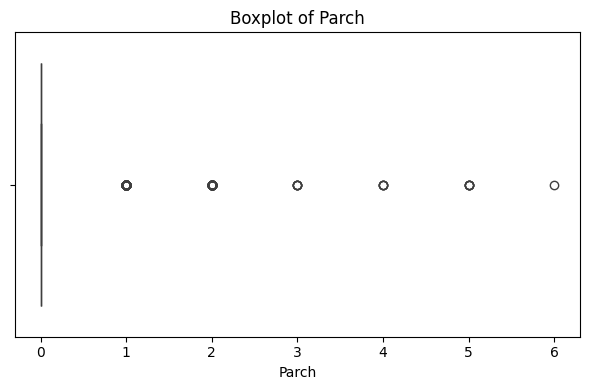

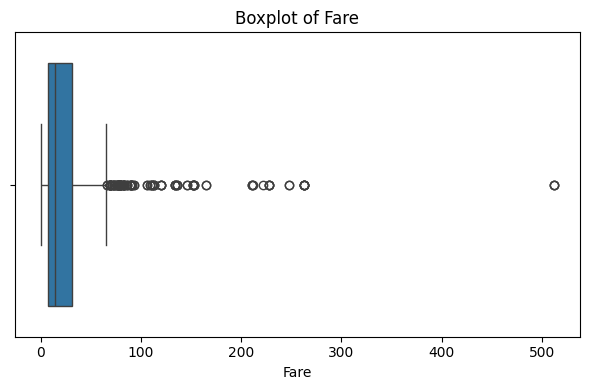

In [16]:

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create boxplots
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

 3.Use pairplot/correlation matrix for feature relationships.


In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)


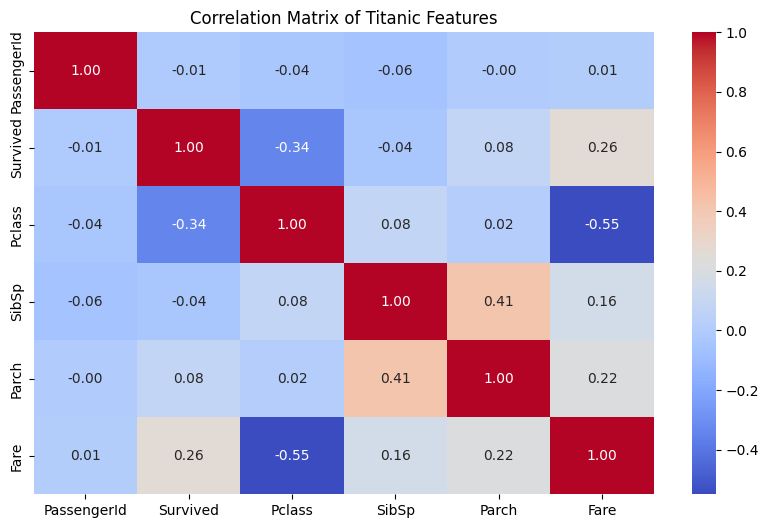

In [18]:
# correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Features')
plt.show()

4.Identify patterns, trends, or anomalies in the data

In [22]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1


<Axes: xlabel='Sex_male', ylabel='count'>

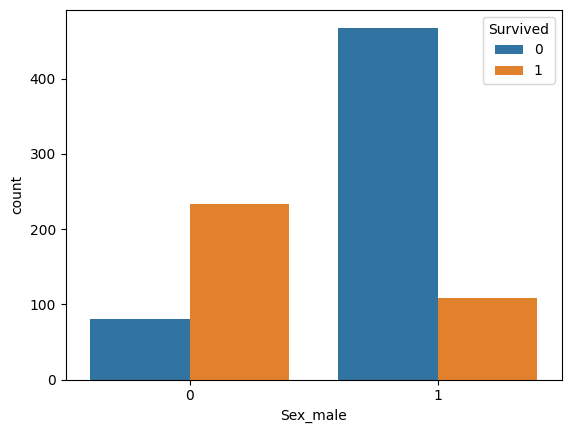

In [23]:
sns.countplot(data=df, x='Sex_male', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

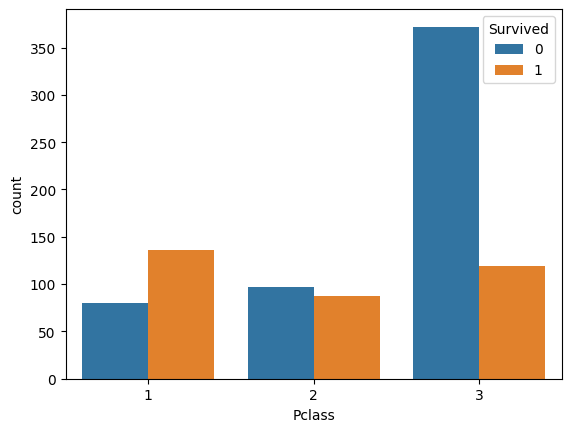

In [24]:
sns.countplot(data=df, x='Pclass', hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

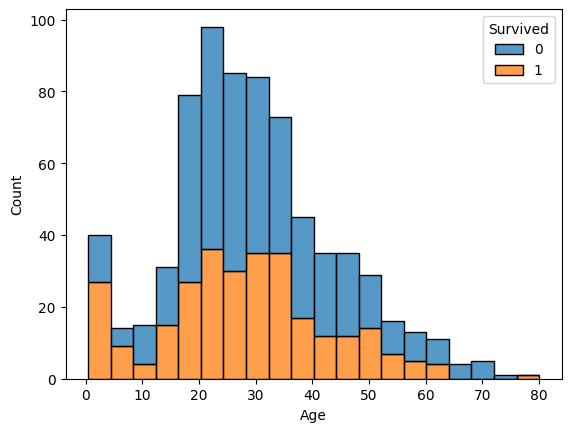

In [25]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)

<Axes: xlabel='Survived', ylabel='Fare'>

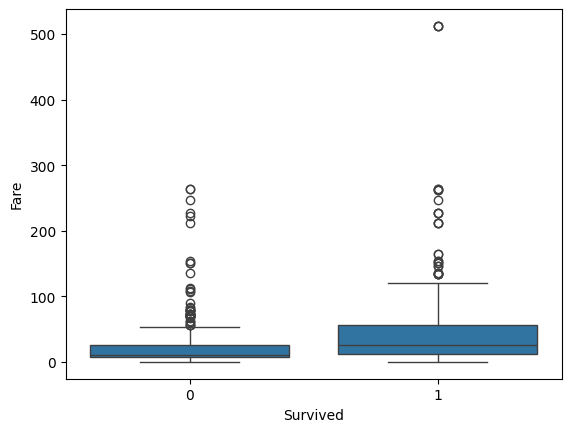

In [26]:
sns.boxplot(data=df, x='Survived', y='Fare')

 5.Make basic feature-level inferences from visuals.
 

<Axes: xlabel='Age', ylabel='Count'>

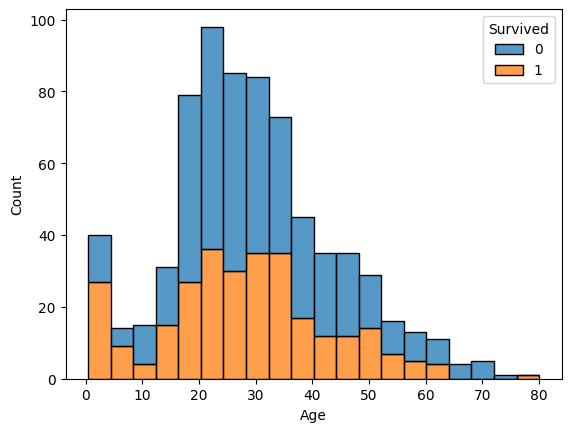

In [28]:
sns.histplot(data=df, x='Age', hue='Survived', bins=20, multiple='stack')